[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/rodreras/geopy_minicurso/HEAD)

# Exercise

Well, we've covered a lot of content so far, and we need to solidify some things.

The idea is to have easy, medium, and hard activities. Searching on Google and consulting Python's documentation and libraries will be your best tools. Your chances of finding what you need will be better if you search in English.

Also, knowing how to use the right words and being patient is essential to finding what you're looking for. Understanding searches takes time, but it's part of the learning process.

___

In the folder `./Notebooks/2_Libraries/Data`, there is a file called  `streamsediments.csv`, and that's what we'll be working with.

It's a public dataset from CPRM of sediments collected in streams for chemical analysis, aimed at identifying any anomalous values for any chemical element, thus directing searches for possible mineral deposits.

____

# Activities

The activities will be described by library and in a checklist format. This way, you'll have a logical sequence of what to dor.

## General

- [x] Import libraries
- [x] Mount Google Drive to the Notebook 

## Pandas

- [ ] Import the data
- [ ] Check if the import was done correctly
- [ ] Check the data types of the dataframe
- [ ] Get a sample of the dataframe with 10 rows
- [ ] View the column names
- [ ] Rename the column Be (ppm) to just Be
- [ ] Look for NaN values
- [ ] Check the number of samples
- [ ] Obtain a statistical description of the data
- [ ] Filter only the sample from  `Patos de Minas`
- [ ] Group the average values of the elements for each sample
- [ ] Group the average values of Ag for each sample
- [ ]  Filter the sample `JR-0016` and get only values of `Th` greater than **9,75**
- [ ] Save your`Patos de Minas` dataframe to the`Data` folder with the name `Patos Sediments.csv`

## Visualization

- [ ] Load the file `Patos Sediments.csv`
- [ ] Create a copy
- [ ] Create a variable called `ag` and then filter only the silver data
- [ ] Create a histogram with:
  -  title
  - Y-axis label
  - 15 bins of red color
  - grid only on the Y-axis
- [ ] Create a boxplot with:
  - title
  - X-axis label
  - Y-axis label
  - grid with transparency
- [ ] Create a variable called  `relation` and filter Ag and Cu values
- [ ] Create an overall frame with 4 graphs
- [ ] In the top graphs, place the histogram of each element. In the bottom two, the box plots.
- [ ] Create a scatter plot between Cu and Au, with:
  - title
  - X and Y axes labels
  - grid
- [ ] Change the colors of the points' edges to gray
- [ ] Export all your figures with .jpeg extension.

In [1]:
#import the libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import os

%matplotlib inline

In [2]:
file = r"C:\Users\USER\PYTHON FOR DATASCIENCE UDEMY\YOUTUBE MACHINE LEARNING PROJECT\GEO_DATASCIENCE\LinkedIn_Geopy_Translation\Python_introduction\notebooks1\sedimentoCorrente.csv"

# reading the file
df = pd.read_csv(file, sep = ';')

In [3]:
# checking if the import was successful
df.head()

,Estação,N__Lab_,X,Y,Folha,Ag (ppm),Al (%),As (ppm),Ba (ppm),Be (ppm),...,Sn (ppm),Sr (ppm),Th (ppm),Ti (%),U (ppm),V (ppm),W (ppm),Y (ppm),Zn (ppm),Zr (ppm)
0,AC-0002,CDE225,248757,7972050,Coromandel,0.03,2.63,4.0,76.0,1.0,...,1.5,3.3,7.4,0.03,0.70,73,0.3,13.15,27,6.3
1,AC-0003,CDE226,244460,7973135,Coromandel,0.02,1.93,2.0,84.0,1.7,...,1.6,3.1,8.2,0.06,0.94,58,0.3,23.90,58,6.9
2,AC-0004,CDE227,244044,7970217,Coromandel,0.04,1.47,3.0,70.0,0.7,...,0.9,3.9,5.4,0.04,0.65,55,0.2,10.40,34,1.8
3,AC-0005,CDE228,242895,7970593,Coromandel,0.05,1.72,23.0,80.0,1.1,...,1.1,3.1,6.9,0.04,1.01,66,0.7,9.34,27,4.1
4,AC-0006,CDE229,242999,7971416,Coromandel,0.04,0.97,7.0,56.0,0.5,...,0.7,2.5,5.7,0.05,0.82,41,0.4,7.45,28,1.5


In [4]:
# Check the data types of the dataframe
df.dtypes

Estação        object
N__Lab_        object
X               int64
Y               int64
Folha          object
Ag (ppm)      float64
Al (%)        float64
As (ppm)      float64
Ba (ppm)      float64
Be (ppm)      float64
Bi (ppm)      float64
Ca (%)        float64
Cd (ppm)      float64
Ce (ppm)      float64
Co (ppm)      float64
Cr (ppm)        int64
Cs (ppm)      float64
Cu (ppm)      float64
Fe (%)        float64
Ga (ppm)      float64
Hf (ppm)      float64
Hg (ppm)      float64
In (ppm)      float64
K (%)         float64
La (ppm)      float64
Li (ppm)      float64
LREE (ppm)    float64
Mg (%)        float64
Mn (ppm)        int64
Mo (ppm)      float64
Nb (ppm)      float64
Ni (ppm)      float64
P (ppm)       float64
Pb (ppm)      float64
Rb (ppm)      float64
Sb (ppm)      float64
Sc (ppm)      float64
Sn (ppm)      float64
Sr (ppm)      float64
Th (ppm)      float64
Ti (%)        float64
U (ppm)       float64
V (ppm)         int64
W (ppm)       float64
Y (ppm)       float64
Zn (ppm)  

In [5]:
# Get a sample of 10 rows from the dataframe
df.sample(10)

,Estação,N__Lab_,X,Y,Folha,Ag (ppm),Al (%),As (ppm),Ba (ppm),Be (ppm),...,Sn (ppm),Sr (ppm),Th (ppm),Ti (%),U (ppm),V (ppm),W (ppm),Y (ppm),Zn (ppm),Zr (ppm)
37,EC-0091,CDE178,251454,7978519,Coromandel,4.51,1.20,5.0,70.0,0.9,...,1.8,3.1,6.1,0.01,0.63,18,0.2,11.80,14,4.0
29,BM-0148,CDD899,244322,7965056,Coromandel,0.06,1.44,5.0,82.0,1.2,...,1.5,4.4,4.9,0.02,0.60,53,0.3,8.08,35,2.7
379,ED0071,CDP 595,261438,7942659,Monte Carmelo,0.01,1.27,1.0,90.0,5.1,...,3.3,6.4,6.4,0.03,2.43,43,0.2,9.66,33,1.3
337,ED0029,CDP 553,278752,7950523,Monte Carmelo,0.01,1.60,2.0,82.0,0.8,...,1.9,4.2,6.9,0.07,1.04,97,0.2,5.86,13,32.6
532,JR-0012,CDI 185,316181,7911430,Patos de Minas,0.23,3.54,4.0,474.0,3.2,...,3.1,42.9,19.1,0.29,2.33,143,0.4,26.31,62,47.5
106,SM-0133,CDE060,256537,7956065,Coromandel,0.04,1.79,4.0,82.0,0.5,...,1.1,5.0,3.6,0.02,0.46,55,0.1,8.83,39,14.2
566,LG-0029,CDE367,318642,7899803,Patos de Minas,0.11,2.57,9.0,265.0,2.5,...,2.1,28.3,16.6,0.11,2.22,119,2.0,18.38,49,54.8
484,BM-0180A,CDI 157,327316,7953453,Patos de Minas,0.13,1.87,5.0,655.0,2.6,...,3.0,132.8,15.0,0.29,2.33,129,0.3,16.05,68,50.0
105,SM-0132,CDE059,257547,7956998,Coromandel,0.03,1.55,2.0,77.0,0.7,...,0.9,6.1,3.5,0.01,0.39,40,0.2,6.68,54,13.4
380,ED0072,CDP 596,261440,7944265,Monte Carmelo,0.01,0.73,3.0,104.0,1.0,...,1.5,9.7,8.9,0.06,1.10,44,0.1,7.10,24,10.4


In [6]:
# See the names of the columns
df.columns

Index(['Estação', 'N__Lab_', 'X', 'Y', 'Folha', 'Ag (ppm)', 'Al (%)',
       'As (ppm)', 'Ba (ppm)', 'Be (ppm)', 'Bi (ppm)', 'Ca (%)', 'Cd (ppm)',
       'Ce (ppm)', 'Co (ppm)', 'Cr (ppm)', 'Cs (ppm)', 'Cu (ppm)', 'Fe (%)',
       'Ga (ppm)', 'Hf (ppm)', 'Hg (ppm)', 'In (ppm)', 'K (%)', 'La (ppm)',
       'Li (ppm)', 'LREE (ppm)', 'Mg (%)', 'Mn (ppm)', 'Mo (ppm)', 'Nb (ppm)',
       'Ni (ppm)', 'P (ppm)', 'Pb (ppm)', 'Rb (ppm)', 'Sb (ppm)', 'Sc (ppm)',
       'Sn (ppm)', 'Sr (ppm)', 'Th (ppm)', 'Ti (%)', 'U (ppm)', 'V (ppm)',
       'W (ppm)', 'Y (ppm)', 'Zn (ppm)', 'Zr (ppm)'],
      dtype='object')

In [7]:
# Rename the column Be (ppm) to just Be
df.rename(columns={'Be (ppm)': 'Be'}, inplace=True)

In [8]:
df.columns

Index(['Estação', 'N__Lab_', 'X', 'Y', 'Folha', 'Ag (ppm)', 'Al (%)',
       'As (ppm)', 'Ba (ppm)', 'Be', 'Bi (ppm)', 'Ca (%)', 'Cd (ppm)',
       'Ce (ppm)', 'Co (ppm)', 'Cr (ppm)', 'Cs (ppm)', 'Cu (ppm)', 'Fe (%)',
       'Ga (ppm)', 'Hf (ppm)', 'Hg (ppm)', 'In (ppm)', 'K (%)', 'La (ppm)',
       'Li (ppm)', 'LREE (ppm)', 'Mg (%)', 'Mn (ppm)', 'Mo (ppm)', 'Nb (ppm)',
       'Ni (ppm)', 'P (ppm)', 'Pb (ppm)', 'Rb (ppm)', 'Sb (ppm)', 'Sc (ppm)',
       'Sn (ppm)', 'Sr (ppm)', 'Th (ppm)', 'Ti (%)', 'U (ppm)', 'V (ppm)',
       'W (ppm)', 'Y (ppm)', 'Zn (ppm)', 'Zr (ppm)'],
      dtype='object')

In [9]:
# Search for NaN values
df.isna().sum()

Estação       0
N__Lab_       0
X             0
Y             0
Folha         0
Ag (ppm)      0
Al (%)        0
As (ppm)      0
Ba (ppm)      0
Be            0
Bi (ppm)      0
Ca (%)        0
Cd (ppm)      0
Ce (ppm)      0
Co (ppm)      0
Cr (ppm)      0
Cs (ppm)      0
Cu (ppm)      0
Fe (%)        0
Ga (ppm)      0
Hf (ppm)      0
Hg (ppm)      0
In (ppm)      0
K (%)         0
La (ppm)      0
Li (ppm)      0
LREE (ppm)    0
Mg (%)        0
Mn (ppm)      0
Mo (ppm)      0
Nb (ppm)      0
Ni (ppm)      0
P (ppm)       0
Pb (ppm)      0
Rb (ppm)      0
Sb (ppm)      0
Sc (ppm)      0
Sn (ppm)      0
Sr (ppm)      0
Th (ppm)      0
Ti (%)        0
U (ppm)       0
V (ppm)       0
W (ppm)       0
Y (ppm)       0
Zn (ppm)      0
Zr (ppm)      0
dtype: int64

In [10]:
# Verify the number of unique samples

unique_samples = df['Estação'].nunique()
print(f'There are {unique_samples} unique samples.')

There are 709 unique samples.


In [11]:
# Obtain a statistical description of the data
df.describe()

,X,Y,Ag (ppm),Al (%),As (ppm),Ba (ppm),Be,Bi (ppm),Ca (%),Cd (ppm),...,Sn (ppm),Sr (ppm),Th (ppm),Ti (%),U (ppm),V (ppm),W (ppm),Y (ppm),Zn (ppm),Zr (ppm)
count,709.000000,7.090000e+02,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,...,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000
mean,290023.887165,7.940832e+06,0.068787,1.984654,5.803949,126.698166,1.354725,0.258166,0.077024,0.066248,...,1.864457,15.901269,11.531312,0.050804,1.431227,66.693935,0.379549,9.807955,37.609309,11.839492
std,30029.640792,2.326216e+04,0.295265,1.448399,4.538870,133.155984,1.537560,0.177348,0.118454,0.094204,...,1.743626,38.049190,14.197642,0.082466,1.341452,47.287505,0.708238,6.568492,20.887808,13.263890
min,236437.000000,7.897972e+06,0.010000,0.270000,1.000000,5.000000,0.100000,0.040000,0.010000,0.010000,...,0.300000,0.500000,0.900000,0.010000,0.210000,9.000000,0.100000,0.880000,3.000000,0.500000
25%,263830.000000,7.921369e+06,0.010000,1.100000,3.000000,68.000000,0.700000,0.150000,0.030000,0.030000,...,1.000000,4.100000,5.700000,0.010000,0.770000,38.000000,0.100000,5.640000,25.000000,4.600000
50%,292163.000000,7.942659e+06,0.040000,1.540000,5.000000,92.000000,1.100000,0.220000,0.060000,0.050000,...,1.500000,6.600000,7.600000,0.020000,1.040000,53.000000,0.200000,8.810000,34.000000,7.800000
75%,315374.000000,7.960605e+06,0.070000,2.370000,8.000000,137.000000,1.500000,0.320000,0.080000,0.080000,...,2.200000,12.700000,10.700000,0.060000,1.530000,81.000000,0.400000,12.090000,47.000000,13.100000
max,341723.000000,7.982200e+06,6.300000,11.090000,41.000000,1750.000000,30.500000,2.850000,1.890000,1.900000,...,35.200000,509.700000,120.700000,0.970000,12.020000,559.000000,12.800000,57.900000,194.000000,111.000000


In [12]:
# Filter only the 'Patos de Minas' sheet
patos = df[df['Folha'] == 'Patos de Minas']
patos.head()

,Estação,N__Lab_,X,Y,Folha,Ag (ppm),Al (%),As (ppm),Ba (ppm),Be,...,Sn (ppm),Sr (ppm),Th (ppm),Ti (%),U (ppm),V (ppm),W (ppm),Y (ppm),Zn (ppm),Zr (ppm)
436,AC-0040A,CDE 261,309858,7921157,Patos de Minas,0.05,3.10,6.0,217.0,1.9,...,2.1,15.3,9.0,0.06,1.69,94,0.1,7.78,61,12.2
437,AC-0041,CDE 262,312258,7918411,Patos de Minas,0.02,2.93,4.0,163.0,1.4,...,2.5,13.9,9.5,0.08,1.63,125,0.1,7.07,32,25.0
438,AC-0042,CDE 263,310746,7918587,Patos de Minas,0.08,3.50,6.0,245.0,1.7,...,2.7,20.2,9.8,0.11,1.70,130,0.2,8.69,50,30.2
439,AC-0043,CDE 264,309209,7916627,Patos de Minas,0.12,3.74,2.0,97.0,3.7,...,3.9,19.2,8.4,0.13,2.48,186,0.2,21.90,49,23.0
440,AC-0044,CDE 265,314540,7917292,Patos de Minas,0.04,2.05,4.0,242.0,2.1,...,2.3,20.8,11.1,0.12,1.70,145,0.1,13.12,39,55.1


In [13]:
# Group the average values of the elements for each sheet

numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df.groupby('Folha')[numeric_cols].mean()
df_numeric

,X,Y,Ag (ppm),Al (%),As (ppm),Ba (ppm),Be,Bi (ppm),Ca (%),Cd (ppm),...,Sn (ppm),Sr (ppm),Th (ppm),Ti (%),U (ppm),V (ppm),W (ppm),Y (ppm),Zn (ppm),Zr (ppm)
Folha,,,,,,,,,,,,,,,,,,,,,
Coromandel,261778.655462,7.966751e+06,0.142941,1.718319,5.369748,93.361345,0.841176,0.216218,0.067479,0.061008,...,1.357143,5.602521,7.210924,0.032773,0.872773,65.235294,0.473109,9.965462,37.420168,8.108403
Lagamar,309398.373913,7.966538e+06,0.074957,1.421826,5.339130,152.243478,0.973043,0.245565,0.136174,0.057391,...,1.246957,24.925217,6.934783,0.042957,0.970087,51.469565,0.233043,9.325304,46.443478,14.531304
Monte Carmelo,262148.564356,7.930840e+06,0.010000,1.820545,4.851485,103.693069,1.990594,0.279455,0.058564,0.045545,...,2.344059,8.570297,20.462871,0.055545,2.275495,60.574257,0.226733,12.423614,29.990099,9.260396
Patos de Minas,314800.194139,7.926099e+06,0.077363,2.459267,6.893773,147.490842,1.268864,0.266007,0.069927,0.087582,...,1.990842,22.013553,8.742125,0.058462,1.244212,78.271062,0.513553,8.007216,39.608059,14.240293


In [14]:
# Group the average values of Ag for each sheet
df.groupby(['Folha'])['Ag (ppm)'].mean()

Folha
Coromandel        0.142941
Lagamar           0.074957
Monte Carmelo     0.010000
Patos de Minas    0.077363
Name: Ag (ppm), dtype: float64

In [15]:
# Filter the 'JR-0016' sample and
df.loc[df['Estação'] == 'JR-0016']

,Estação,N__Lab_,X,Y,Folha,Ag (ppm),Al (%),As (ppm),Ba (ppm),Be,...,Sn (ppm),Sr (ppm),Th (ppm),Ti (%),U (ppm),V (ppm),W (ppm),Y (ppm),Zn (ppm),Zr (ppm)
536,JR-0016,CDI 189,292163,7951599,Patos de Minas,0.07,0.79,6.0,93.0,0.7,...,0.9,8.4,4.9,0.02,0.77,55,0.8,3.43,33,16.6


In [16]:
# only get values of Th greater than 9.75
df.loc[df['Th (ppm)'] > 9.75]

,Estação,N__Lab_,X,Y,Folha,Ag (ppm),Al (%),As (ppm),Ba (ppm),Be,...,Sn (ppm),Sr (ppm),Th (ppm),Ti (%),U (ppm),V (ppm),W (ppm),Y (ppm),Zn (ppm),Zr (ppm)
15,BM-0132,CDD885,249709,7955769,Coromandel,0.04,0.78,2.0,62.0,0.9,...,1.2,5.7,107.3,0.07,8.26,29,0.2,21.26,22,7.1
17,BM-0134,CDD887,237612,7955143,Coromandel,0.06,1.03,2.0,66.0,1.5,...,1.7,5.6,10.9,0.05,1.43,48,0.1,9.99,21,6.6
19,BM-0136,CDD889,248597,7952904,Coromandel,0.08,3.11,7.0,88.0,2.0,...,2.7,8.5,10.3,0.04,1.45,121,0.4,19.66,27,7.8
27,BM-0146,CDD897,248521,7962214,Coromandel,0.03,2.61,7.0,160.0,1.5,...,2.4,5.8,10.4,0.04,1.25,107,0.3,43.60,30,10.4
42,EC-0121,CDE208,268495,7959156,Coromandel,0.14,0.95,12.0,440.0,1.3,...,2.1,41.3,12.6,0.21,1.09,173,0.5,13.83,29,72.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,SQ-0024,CDI 265,335287,7949753,Patos de Minas,0.07,2.04,3.0,1184.0,3.6,...,3.4,259.3,12.1,0.37,2.28,148,0.4,22.78,85,29.9
686,SQ-0025,CDI 266,335059,7948312,Patos de Minas,0.06,1.53,6.0,501.0,1.7,...,2.2,95.8,10.3,0.23,1.56,102,0.5,14.89,70,37.5
687,SQ-0026,CDI 267,335904,7946921,Patos de Minas,0.05,1.72,11.0,112.0,1.1,...,1.6,10.6,10.0,0.03,1.22,66,1.1,12.73,51,7.4
691,SQ-0030A,CDI 271,332271,7947548,Patos de Minas,0.04,1.95,5.0,873.0,2.7,...,2.9,210.1,13.0,0.32,2.17,147,0.2,21.38,86,33.0


In [17]:
path =r"C:\Users\USER\PYTHON FOR DATASCIENCE UDEMY\YOUTUBE MACHINE LEARNING PROJECT\GEO_DATASCIENCE\LinkedIn_Geopy_Translation\Python_introduction\notebooks1"

# let's put the entire path in a variable to make it easier
file_path = os.path.join(path, 'sediments_data.csv')

# saving file
patos.to_csv(file_path, index=False) # remember patos 'we filtered location to Patos de Minas'

In [18]:
# Load the file sediments_ducks.csv

sedPato = pd.read_csv(file_path)
sedPato .head()

,Estação,N__Lab_,X,Y,Folha,Ag (ppm),Al (%),As (ppm),Ba (ppm),Be,...,Sn (ppm),Sr (ppm),Th (ppm),Ti (%),U (ppm),V (ppm),W (ppm),Y (ppm),Zn (ppm),Zr (ppm)
0,AC-0040A,CDE 261,309858,7921157,Patos de Minas,0.05,3.10,6.0,217.0,1.9,...,2.1,15.3,9.0,0.06,1.69,94,0.1,7.78,61,12.2
1,AC-0041,CDE 262,312258,7918411,Patos de Minas,0.02,2.93,4.0,163.0,1.4,...,2.5,13.9,9.5,0.08,1.63,125,0.1,7.07,32,25.0
2,AC-0042,CDE 263,310746,7918587,Patos de Minas,0.08,3.50,6.0,245.0,1.7,...,2.7,20.2,9.8,0.11,1.70,130,0.2,8.69,50,30.2
3,AC-0043,CDE 264,309209,7916627,Patos de Minas,0.12,3.74,2.0,97.0,3.7,...,3.9,19.2,8.4,0.13,2.48,186,0.2,21.90,49,23.0
4,AC-0044,CDE 265,314540,7917292,Patos de Minas,0.04,2.05,4.0,242.0,2.1,...,2.3,20.8,11.1,0.12,1.70,145,0.1,13.12,39,55.1


In [19]:
#Create a copy
patoCopy = sedPato.copy()

patoCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 47 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Estação     273 non-null    object 
 1   N__Lab_     273 non-null    object 
 2   X           273 non-null    int64  
 3   Y           273 non-null    int64  
 4   Folha       273 non-null    object 
 5   Ag (ppm)    273 non-null    float64
 6   Al (%)      273 non-null    float64
 7   As (ppm)    273 non-null    float64
 8   Ba (ppm)    273 non-null    float64
 9   Be          273 non-null    float64
 10  Bi (ppm)    273 non-null    float64
 11  Ca (%)      273 non-null    float64
 12  Cd (ppm)    273 non-null    float64
 13  Ce (ppm)    273 non-null    float64
 14  Co (ppm)    273 non-null    float64
 15  Cr (ppm)    273 non-null    int64  
 16  Cs (ppm)    273 non-null    float64
 17  Cu (ppm)    273 non-null    float64
 18  Fe (%)      273 non-null    float64
 19  Ga (ppm)    273 non-null    f

In [20]:
# Create a variable called ag and then filter only the silver data

ag = sedPato.filter(items=['Station',
                            'Lab_No',
                            'X',
                            'Y',
                            'Sheet',
                            'Ag (ppm)'])
ag

,X,Y,Ag (ppm)
0,309858,7921157,0.05
1,312258,7918411,0.02
2,310746,7918587,0.08
3,309209,7916627,0.12
4,314540,7917292,0.04
...,...,...,...
268,326994,7915197,0.09
269,327407,7911937,0.07
270,328659,7907617,0.17
271,323759,7905774,0.05


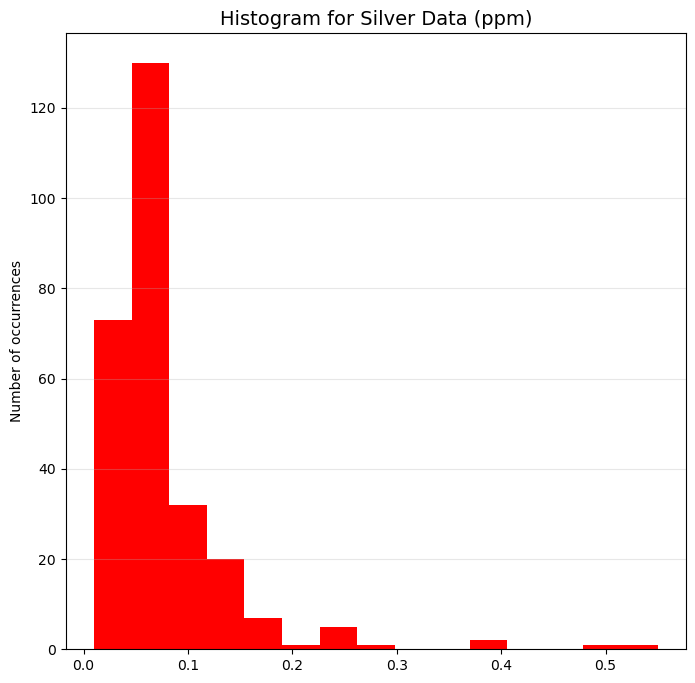

In [21]:
# Create a histogram

# Main figure
fig, ax = plt.subplots(figsize=(8,8))

x = ag['Ag (ppm)']

# Histogram
ax.hist(x,
        bins=15,
        color='red');

ax.set_title('Histogram for Silver Data (ppm)',
             fontsize=14);

plt.ylabel('Number of occurrences');
plt.grid(axis='y', alpha=0.3);

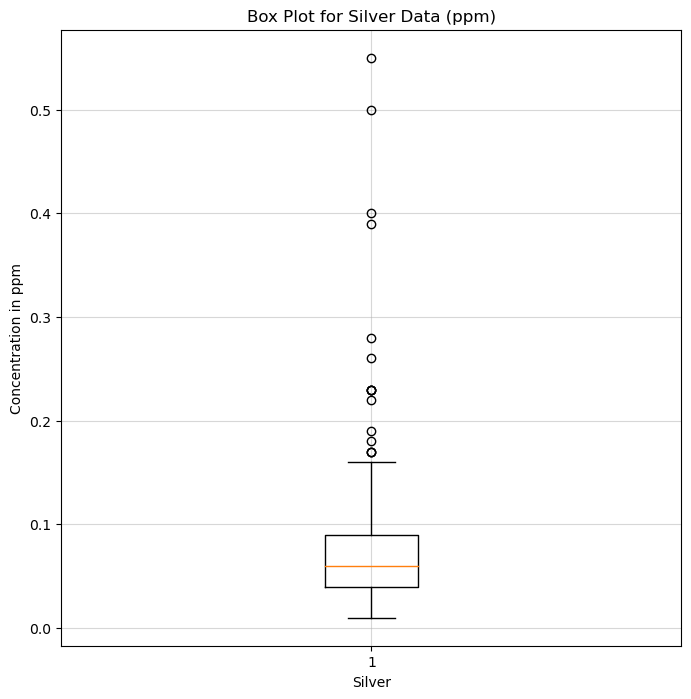

In [22]:
# Create a boxplot

# creating the figure
fig, ax = plt.subplots(figsize=(8,8))

ax.boxplot(x);
plt.grid(alpha=0.5);
ax.set_title('Box Plot for Silver Data (ppm)');
plt.xlabel('Silver');
plt.ylabel('Concentration in ppm');



In [23]:
# Create a variable called relation and filter values of Ag and Cu
relation = patoCopy.filter(items=['Station',
                                  'Lab_No',
                                  'X',
                                  'Y',
                                  'Sheet',
                                  'Ag (ppm)',
                                  'Cu (ppm)'])
relation.head()

,X,Y,Ag (ppm),Cu (ppm)
0,309858,7921157,0.05,39.6
1,312258,7918411,0.02,31.4
2,310746,7918587,0.08,42.9
3,309209,7916627,0.12,69.6
4,314540,7917292,0.04,40.9


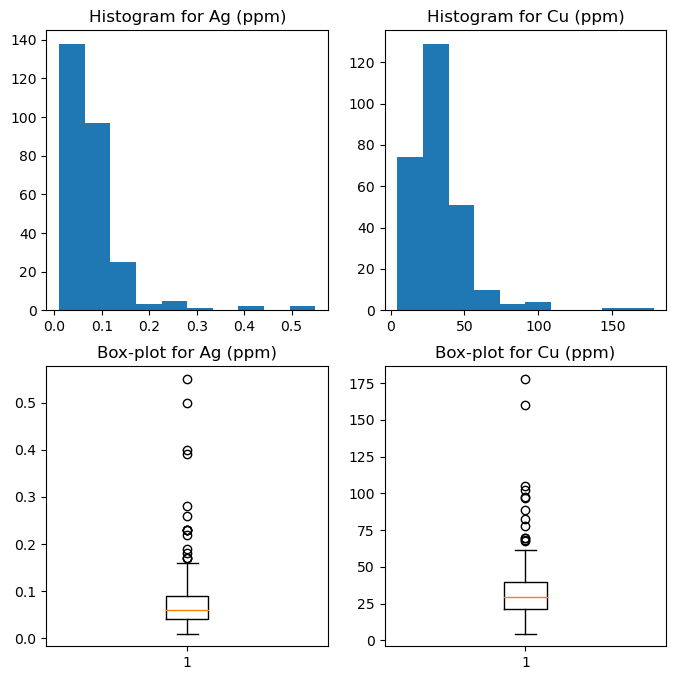

In [24]:
# Create a general framework with 4 graphics

fig, ax = plt.subplots(2,2, figsize=(8,8))

# In the upper graphics, place the histogram of each element.
# In the two below, the box-plots.

# top right graphic
ax[0,1].hist(relation['Cu (ppm)']);
ax[0,1].set_title('Histogram for Cu (ppm)');

# bottom left graphic
ax[1,1].boxplot(relation['Cu (ppm)']);
ax[1,1].set_title('Box-plot for Cu (ppm)');

# top left graphic
ax[0,0].hist(relation['Ag (ppm)']);
ax[0,0].set_title('Histogram for Ag (ppm)');

# bottom left graphic
ax[1,0].boxplot(relation['Ag (ppm)']);
ax[1,0].set_title('Box-plot for Ag (ppm)');



C:\Users\USER\AppData\Local\Temp\ipykernel_13572\4239167857.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plot = ax.scatter(x=relation['Ag (ppm)'],


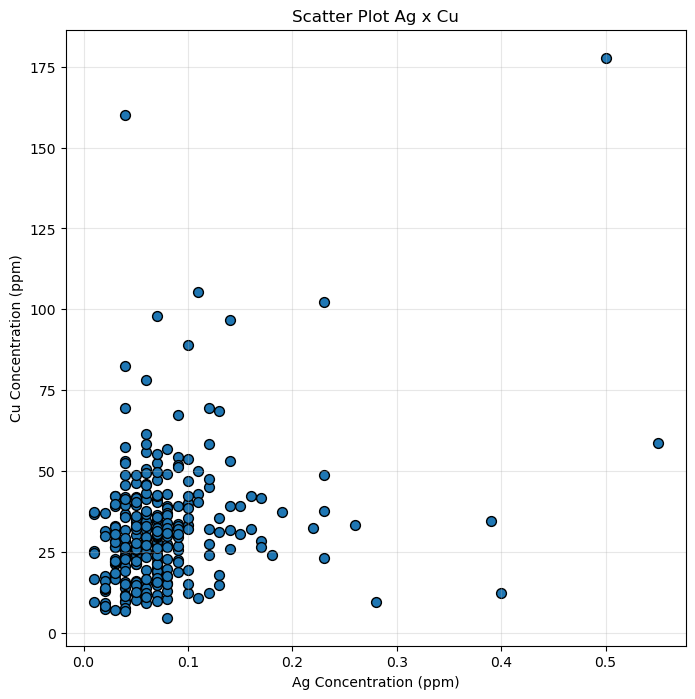

In [25]:
# Create a scatter plot between Cu and Au
fig, ax = plt.subplots(figsize=(8,8))

# defining the color
cmap = plt.cm.hsv

# creating the graph
plot = ax.scatter(x=relation['Ag (ppm)'],
                  y=relation['Cu (ppm)'],
                  cmap=cmap,
                  edgecolor='black',
                  s=50
                  );

# setting axis names
plt.xlabel('Ag Concentration (ppm)');
plt.ylabel('Cu Concentration (ppm)');

# graph title
ax.set_title('Scatter Plot Ag x Cu');

# grid
plt.grid(alpha=0.3);